### NOTES:
BART: standard deviations not calculated correctly.


In [118]:
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 2000)
%matplotlib inline

In [2]:
dmt = pd.read_csv('data/DMT_Data_Merged_10.25.17.csv')

## BART

In [3]:
dmt.head()

internalId externalId passive_phone_model  passive_bat_charge_avg  \
0       70052     2w4MVh                 NaN                     NaN   
1       70061     2XdEfU              iPhone                6.835596   
2       70087     2XyVyJ                 NaN                     NaN   
3       70074     34fjYg                 NaN                     NaN   
4       70133     3FGrfL                 NaN                     NaN   

   passive_bat_charge_less_5hr  passive_bat_charge_start_mean  \
0                          NaN                            NaN   
1                     0.708333                      52.611111   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   

   passive_bat_charge_end_mean  passive_bat_charge_increase_mean  \
0                          NaN                               NaN   
1                    75.104167                         22.493056   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   passive_bat_charge_less_20percent  passive_bat_charge_greater_80percent  \
0                                NaN                                   NaN   
1                           0.159722                                  0.25   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   

   passive_screen_unlock_num  passive_screen_unlock_less_1min  \
0                        NaN                              NaN   
1                        573                          0.47993   
2                        NaN                              NaN   
3                        NaN                              NaN   
4                        NaN                              NaN   

   passive_screen_unlock_avg_per_day  passive_screen_unlock_avg_time_min  \
0                                NaN                                 NaN   
1                          27.130371                            4.941992   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   passive_screen_unlock_time_ratio  passive_call_out  passive_call_in  \
0                               NaN               NaN              NaN   
1                           0.09311                22               26   
2                               NaN               NaN              NaN   
3                               NaN               NaN              NaN   
4                               NaN               NaN              NaN   

   passive_call_total  passive_call_out_ratio  passive_call_avg_min  \
0                 NaN                     NaN                   NaN   
1                  48                0.458333              2.859375   
2                 NaN                     NaN                   NaN   
3                 NaN                     NaN                   NaN   
4                 NaN                     NaN                   NaN   

   passive_call_out_wait_durations  SAGE_demographics_v2___ROW_ID  \
0                              NaN                             39   
1                         8.636364                             50   
2                              NaN                             77   
3                              NaN                             74   
4                              NaN                            149   

   SAGE_demographics_v2___ROW_VERSION       SAGE_demographics_v2___recordId  \
0                                  16  0843556f-1a8a-49a9-9684-5ddc1c204bc6   
1       

In [44]:
def pumps_convert(row, segment=None):
    if pd.notnull(row) and segment:
        seg = segment - 1
        ix = (0 + (seg * 5), 5 + seg * 5)
        return [float(x) for x in row.strip('[]').split(',')][ix[0]:ix[1]]
    elif pd.notnull(row) and not segment:
        return [float(x) for x in row.strip('[]').split(',')]
    else:
        return row

pumps = dmt['SAGE_bart_v4_baseline_BART0.25___pumps_per_balloon'].apply(pumps_convert)
pumps_first = dmt['SAGE_bart_v4_baseline_BART0.25___pumps_per_balloon'].apply(lambda x: pumps_convert(x, segment=1))
pumps_second = dmt['SAGE_bart_v4_baseline_BART0.25___pumps_per_balloon'].apply(lambda x: pumps_convert(x, segment=2))
pumps_third = dmt['SAGE_bart_v4_baseline_BART0.25___pumps_per_balloon'].apply(lambda x: pumps_convert(x, segment=3))

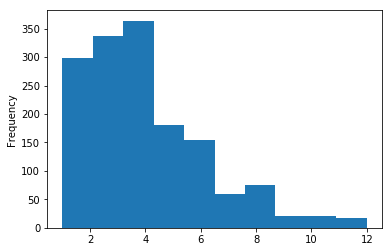

In [119]:
pd.Series(pumps_raw).plot.hist()

In [52]:
## Check to see if pumps are segmented correctly.

all(
    [all(pumps.head(20).apply(lambda x: x[0:5]) == pumps_first.head(20)),
     all(pumps.head(20).apply(lambda x: x[5:10]) == pumps_second.head(20)),
     all(pumps.head(20).apply(lambda x: x[10:15]) == pumps_third.head(20))]
)

True

In [80]:
#means
all(
    [all(np.isclose(pumps.apply(np.mean), dmt['SAGE_bart_v4_baseline_BART0.25___pumps_mean'], equal_nan=True)),
     all(pumps.head(20).apply(lambda x: np.mean(x[0:5])) == pumps_first.head(20).apply(np.mean)),
     all(pumps.head(20).apply(lambda x: np.mean(x[5:10])) == pumps_second.head(20).apply(np.mean)),
     all(pumps.head(20).apply(lambda x: np.mean(x[10:15])) == pumps_third.head(20).apply(np.mean))]
)

True

In [83]:
#standard deviation  !!!!!!!!!!!!!!ERRORS IN DATA!!!!!!!!!
all(
    [all(np.isclose(pumps.apply(np.std), dmt['SAGE_bart_v4_baseline_BART0.25___pumps_standard_deviation'], equal_nan=True)),
     all(pumps.head(20).apply(lambda x: np.std(x[0:5])) == pumps_first.head(20).apply(np.std)),
     all(pumps.head(20).apply(lambda x: np.std(x[5:10])) == pumps_second.head(20).apply(np.std)),
     all(pumps.head(20).apply(lambda x: np.std(x[10:15])) == pumps_third.head(20).apply(np.std))]
)

False

## Delay Discounting

In [121]:
dmt.head(10)

internalId externalId passive_phone_model  passive_bat_charge_avg  \
0       70052     2w4MVh                 NaN                     NaN   
1       70061     2XdEfU              iPhone                6.835596   
2       70087     2XyVyJ                 NaN                     NaN   
3       70074     34fjYg                 NaN                     NaN   
4       70133     3FGrfL                 NaN                     NaN   
5       70024     3MhSZ8                 NaN                     NaN   
6       70122     3Vv4Le              iPhone                2.869832   
7       70039     3YSsRf              iPhone                6.110656   
8       70017     4chdWY                 NaN                     NaN   
9       70127     4CUvwZ                 NaN                     NaN   

   passive_bat_charge_less_5hr  passive_bat_charge_start_mean  \
0                          NaN                            NaN   
1                     0.708333                      52.611111   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   
5                          NaN                            NaN   
6                     0.344262                      68.377049   
7                     0.767442                      61.891473   
8                          NaN                            NaN   
9                          NaN                            NaN   

   passive_bat_charge_end_mean  passive_bat_charge_increase_mean  \
0                          NaN                               NaN   
1                    75.104167                         22.493056   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   
5                          NaN                               NaN   
6                    90.786885                         22.409836   
7                    79.713178                         17.821705   
8                          NaN                               NaN   
9                          NaN                               NaN   

   passive_bat_charge_less_20percent  passive_bat_charge_greater_80percent  \
0                                NaN                                   NaN   
1                           0.159722                              0.250000   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   
5                                NaN                                   NaN   
6                           0.032787                              0.508197   
7                           0.031008                              0.232558   
8                                NaN                                   NaN   
9                                NaN                                   NaN   

   passive_screen_unlock_num  passive_screen_unlock_less_1min  \
0                        NaN                              NaN   
1                        573                         0.479930   
2                        NaN                              NaN   
3                        NaN                              NaN   
4                        NaN                              NaN   
5                        NaN                              NaN   
6                       1274                         0.445055   
7                       1384                         0.441474   
8                        NaN                              NaN   
9                        NaN                              NaN   

   passive_screen_unlock_avg_per_day  passive_screen_unlock_avg_time_min  \
0                                NaN                                 NaN   
1                 